KeyboardInterrupt: 

Exception ignored in: 'statsmodels.nonparametric._smoothers_lowess.calculate_weights'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in sum
KeyboardInterrupt: 


[312.54552646]
[371707.54189121]


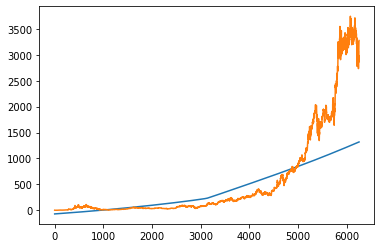

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('C:/Users/aless/Desktop/AMZN.csv',header=0)
df = df[df.Date.str.split('-',expand=True)[0].isin(["2021","2022"])]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date")

#LOWESS
lowess = sm.nonparametric.lowess
z = lowess(df.Open,np.arange(0,len(df.Open),1),frac=1.)
w = np.reshape(z[:,1],len(z[:,1]))


SerieSmooth = pd.DataFrame(columns=["Date","Open"])
SerieSmooth["Date"] = df.Date
SerieSmooth["Open"] = w
SerieSmooth.set_index("Date")

print(mean_absolute_error(df.Open,SerieSmooth.Open,multioutput='raw_values'))
print(mean_squared_error(df.Open,SerieSmooth.Open,multioutput='raw_values'))

SerieSmooth["Open"].plot()
df["Open"].plot()

plt.show()


